# <h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [2]:
n=170
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
#import football.gml from local file using nx.read_gml
football_graph = nx.read_gml('football.gml')

In [4]:
#check if football is directed
nx.is_directed(football_graph)

False

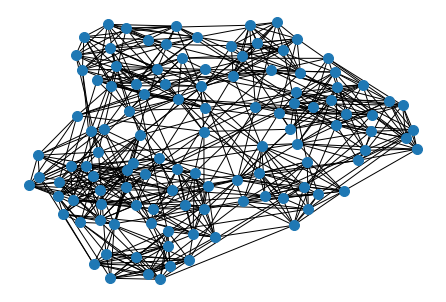

In [5]:
#visualize football
nx.draw(football_graph, node_size = 100)
# Using draw_networkx uses node names and its difficult to see the graph

In [6]:
#import lesmis.gml
lesmis_graph = nx.read_gml('lesmis.gml')

In [7]:
#check if lesmis is directed
nx.is_directed(lesmis_graph)

False

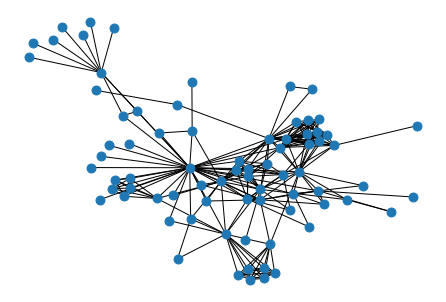

In [8]:
#visualize lesmis
nx.draw(lesmis_graph, node_size = 80)

In [9]:
#import dolphins.gml
dolphins_graph = nx.read_gml('dolphins.gml')

In [11]:
#check if dolphins is directed
nx.is_directed(dolphins_graph)

False

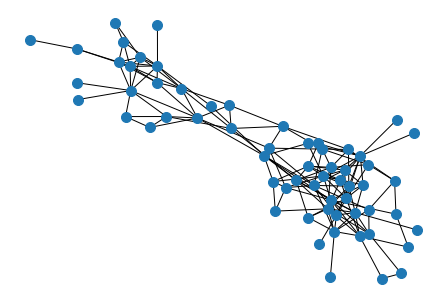

In [13]:
#visualize dolphins
nx.draw(dolphins_graph, node_size = 100)

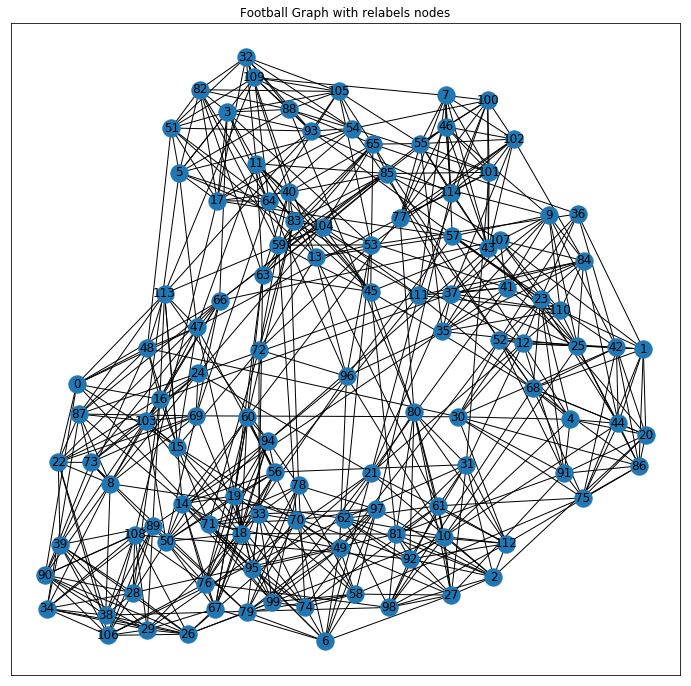

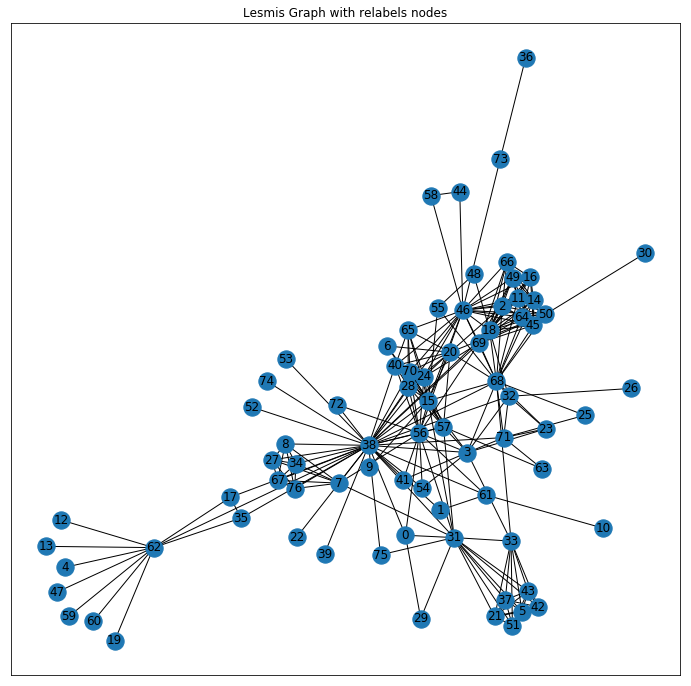

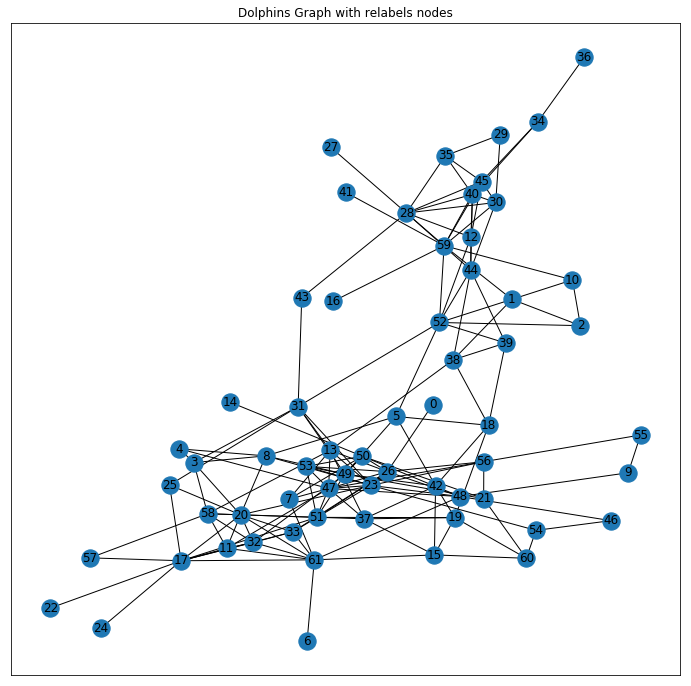

In [14]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    G_mapping = {v: k for k, v in G_mapping.items()}
    return nG,G_mapping

# There exists already made function nx.convert_node_labels_to_integers that does the same thing more compact

nfootball,football_map=conv2int(football_graph,0)
nlesmis, lesmis_map=conv2int(lesmis_graph,0)
ndolphins, dolphins_map=conv2int(dolphins_graph,0)

#G=nx.relabel_nodes(nG,G_mapping)
new_football = nx.relabel_nodes(nfootball, football_map)
new_lesmis = nx.relabel_nodes(nlesmis, lesmis_map)
new_dolphins = nx.relabel_nodes(ndolphins, dolphins_map)

#nx.draw_networkx(nx.convert_node_labels_to_integers(football_graph))
plt.figure(1, figsize=(12,12))
plt.title('Football Graph with relabels nodes')
nx.draw_networkx(new_football)
plt.figure(2, figsize=(12,12))
plt.title('Lesmis Graph with relabels nodes')
nx.draw_networkx(new_lesmis)
plt.figure(3, figsize=(12,12))
plt.title('Dolphins Graph with relabels nodes')
nx.draw_networkx(new_dolphins)


<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

REG mean degree is:  4.0
RGER mean degree is:  4.0
RGG mean degree is:  10.6
SW mean degree is:  4.0
SF mean degree is:  7.811764705882353
Football mean degree is:  10.660869565217391
Lesmis mean degree is:  6.597402597402597
Dolphins mean degree is:  5.129032258064516


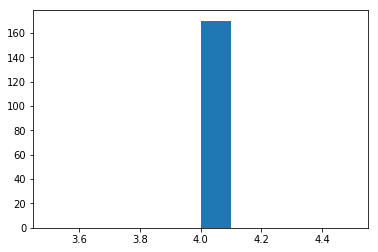

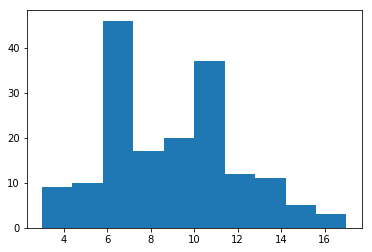

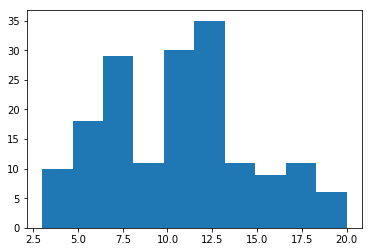

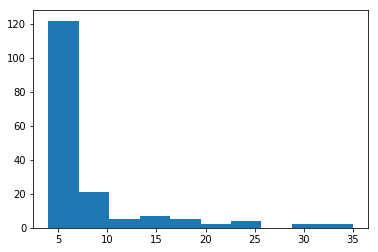

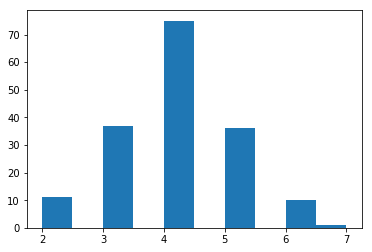

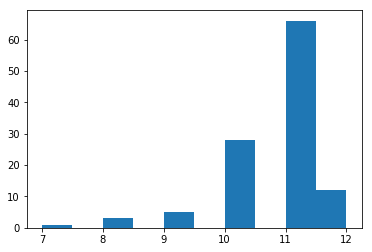

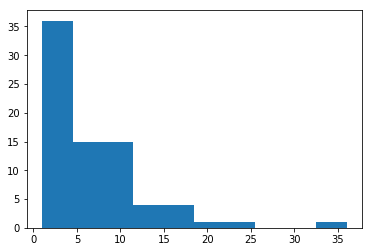

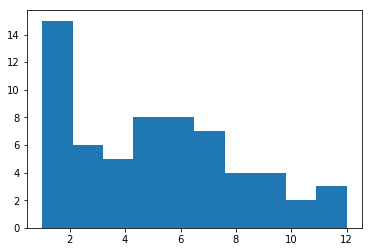

In [15]:
def find_degree(G):
    return dict(G.degree())

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(new_football)
lesmis_degree = find_degree(new_lesmis)
dolphins_degree = find_degree(new_dolphins)

def degree_hist(G_degree, index):
    plt.figure(index)
    plt.hist(list(G_degree.values()))#, width = 1)

all_graphs = [REG_degree, RGER_degree, RGG_degree, SF_degree, SW_degree, football_degree, lesmis_degree, dolphins_degree]   

for i in range(len(all_graphs)):
    degree_hist(all_graphs[i], i)

meaner = lambda a: np.mean(list(a.values()))

mean_degree_REG = meaner(REG_degree)
mean_degree_RGER = meaner(REG_degree)
mean_degree_RGG = meaner(RGG_degree)
mean_degree_SW = meaner(SW_degree)
mean_degree_SF = meaner(SF_degree)
mean_degree_football = meaner(football_degree)
mean_degree_lesmis = meaner(lesmis_degree)
mean_degree_dolphins = meaner(dolphins_degree)

print('REG mean degree is: ', mean_degree_REG)
print('RGER mean degree is: ', mean_degree_RGER)
print('RGG mean degree is: ', mean_degree_RGG)
print('SW mean degree is: ', mean_degree_SW)
print('SF mean degree is: ', mean_degree_SF)
print('Football mean degree is: ', mean_degree_football)
print('Lesmis mean degree is: ', mean_degree_lesmis)
print('Dolphins mean degree is: ', mean_degree_dolphins)

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

REG mean clustering coefficient is:  0.5
RGER mean clustering coefficient is:  0.045896229875468625
RGG mean clustering coefficient is:  0.6690938227174795
SW mean clustering coefficient is:  0.22056022408963585
SF mean clustering coefficient is:  0.09968141153199503
Football mean clustering coefficient is:  0.403216011042098
Lesmis mean clustering coefficient is:  0.5731367499320135
Dolphins mean clustering coefficient is:  0.25895824605502027


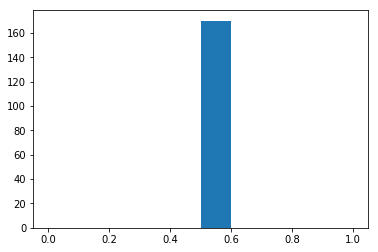

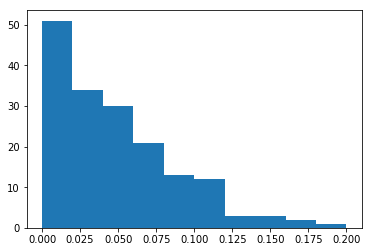

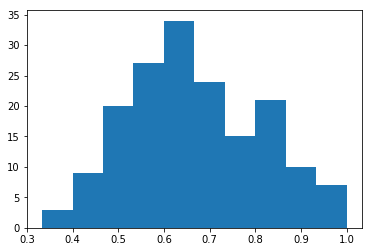

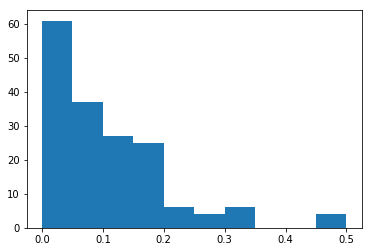

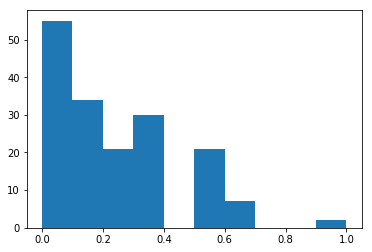

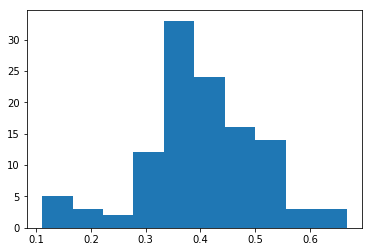

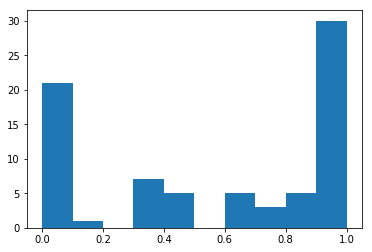

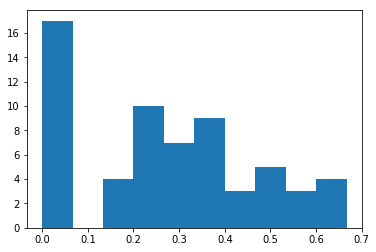

In [16]:
def clust_coef(G):
    return nx.clustering(G)

REG_cc = clust_coef(REG)
RGER_cc = clust_coef(RGER)
RGG_cc = clust_coef(RGG)
SF_cc = clust_coef(SF)
SW_cc = clust_coef(SW)
football_cc = clust_coef(new_football)
lesmis_cc = clust_coef(new_lesmis)
dolphins_cc = clust_coef(new_dolphins)

def cc_hist(G_cc, index):
    plt.figure(index)
    plt.hist(list(G_cc.values()))
    
all_graphs_cc = [REG_cc, RGER_cc, RGG_cc, SF_cc, SW_cc, football_cc, lesmis_cc, dolphins_cc]   

for i in range(len(all_graphs_cc)):
    degree_hist(all_graphs_cc[i], i)

meaner = lambda a: np.mean(list(a.values()))


mean_cc_REG = meaner(REG_cc)
mean_cc_RGER = meaner(RGER_cc)
mean_cc_RGG = meaner(RGG_cc)
mean_cc_SW = meaner(SW_cc)
mean_cc_SF = meaner(SF_cc)
mean_cc_football = meaner(football_cc)
mean_cc_lesmis = meaner(lesmis_cc)
mean_cc_dolphins = meaner(dolphins_cc)

print('REG mean clustering coefficient is: ', mean_cc_REG)
print('RGER mean clustering coefficient is: ', mean_cc_RGER)
print('RGG mean clustering coefficient is: ', mean_cc_RGG)
print('SW mean clustering coefficient is: ', mean_cc_SW)
print('SF mean clustering coefficient is: ', mean_cc_SF)
print('Football mean clustering coefficient is: ', mean_cc_football)
print('Lesmis mean clustering coefficient is: ', mean_cc_lesmis)
print('Dolphins mean clustering coefficient is: ', mean_cc_dolphins)

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

REG mean ego-betweenness centrality is:  1.0
RGER mean ego-betweenness centrality is:  18.33823529411765
RGG mean ego-betweenness centrality is:  3.9473372297637
SW mean ego-betweenness centrality is:  2.461764705882353
SF mean ego-betweenness centrality is:  19.178627450980393
Football mean ego-betweenness centrality is:  12.361066252587992
Lesmis mean ego-betweenness centrality is:  6.659230055658626
Dolphins mean ego-betweenness centrality is:  4.258736559139785


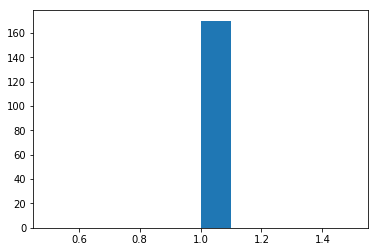

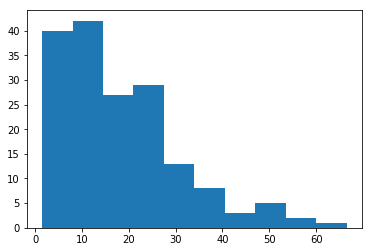

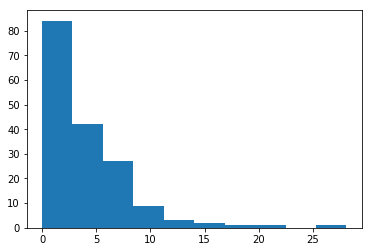

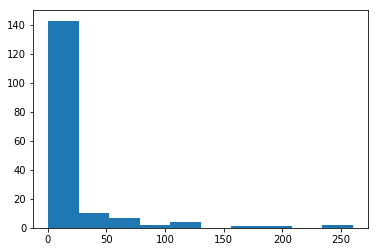

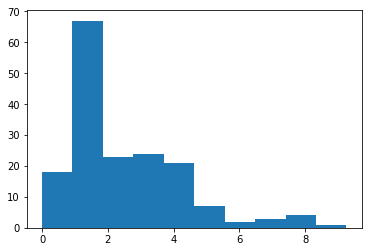

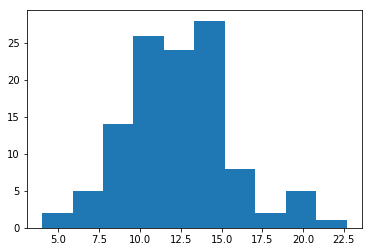

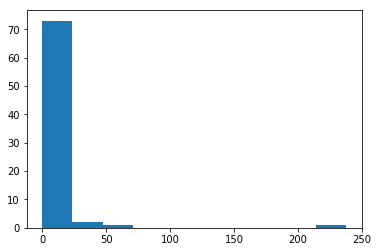

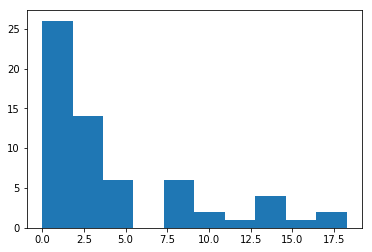

In [17]:
def ego_centrality(G):
    result = []
    for i in range(len(G.nodes)):
        ego = nx.ego_graph(G,i)
        adj_mat = (nx.adjacency_matrix(ego)).todense()
        #print(adj_mat)
        hadamard_product = np.multiply(np.linalg.matrix_power(adj_mat, 2), (1 - adj_mat))
        #print(hadamard_product)
        up_triangular = np.triu(hadamard_product, 1)
        #print(up_triangular)
        non_zero = list(up_triangular[np.nonzero(up_triangular)])
        #print(non_zero)
        half_sum_of_recipr = sum(1/i for i in non_zero) / 2
        result.append(half_sum_of_recipr)
    return result


REG_ebtw = ego_centrality(REG) 
RGER_ebtw = ego_centrality(RGER)
RGG_ebtw = ego_centrality(RGG)
SF_ebtw = ego_centrality(SF)
SW_ebtw = ego_centrality(SW)
nfootball_ebtw = ego_centrality(new_football)
nlesmis_ebtw = ego_centrality(new_lesmis)
ndolphins_ebtw = ego_centrality(new_dolphins)

def egobtw_hist(G_ebtw, index): 
    plt.figure(index)
    plt.hist(list(G_ebtw))
    
all_graphs_ebtw = [REG_ebtw, RGER_ebtw, RGG_ebtw, SF_ebtw, SW_ebtw, nfootball_ebtw, nlesmis_ebtw, ndolphins_ebtw]   

for i in range(len(all_graphs_ebtw)):
    egobtw_hist(all_graphs_ebtw[i], i)

meaner = lambda a: np.mean(list(a))


mean_ebtw_REG = meaner(REG_ebtw)
mean_ebtw_RGER = meaner(RGER_ebtw)
mean_ebtw_RGG = meaner(RGG_ebtw)
mean_ebtw_SW = meaner(SW_ebtw)
mean_ebtw_SF = meaner(SF_ebtw)
mean_ebtw_football = meaner(nfootball_ebtw)
mean_ebtw_lesmis = meaner(nlesmis_ebtw)
mean_ebtw_dolphins = meaner(ndolphins_ebtw)

print('REG mean ego-betweenness centrality is: ', mean_ebtw_REG)
print('RGER mean ego-betweenness centrality is: ', mean_ebtw_RGER)
print('RGG mean ego-betweenness centrality is: ', mean_ebtw_RGG)
print('SW mean ego-betweenness centrality is: ', mean_ebtw_SW)
print('SF mean ego-betweenness centrality is: ', mean_ebtw_SF)
print('Football mean ego-betweenness centrality is: ', mean_ebtw_football)
print('Lesmis mean ego-betweenness centrality is: ', mean_ebtw_lesmis)
print('Dolphins mean ego-betweenness centrality is: ', mean_ebtw_dolphins)

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση networkx.algorithms.community.quality.modularity.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [18]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [19]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity
import itertools
from operator import itemgetter

def comd_GN(G,k):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: 0 < len(c) <= k, comp)
    result = []
    for communities in limited:
        all_com = (tuple(sorted(c) for c in communities))
        modularity = nx.algorithms.community.quality.modularity(G, all_com)
        result.append([modularity, all_com])
    return(max(result, key = itemgetter(0)))

#com = comd_GN(RGG, 50)[1]
#print(tuple(sorted(c) for c in com))

<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [20]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity
from sklearn.cluster import SpectralClustering
from collections import defaultdict
import itertools
from operator import itemgetter

def make_node_labels_to_dict(node_labels): # after creating zip of node and labels we need to make it as a dict in order to get the cluster
    d = defaultdict(list)
    for k, *v in node_labels:
        d[k].append(v)
    return d

def dict_to_community(d): # from given dictionary return list of tuples of communities
    communities = []
    for k, v in d.items():
        val = ([item for sublist in v for item in sublist]) # simplify multilists into one single list
        communities.append(val)
    return communities
    
def comd_SP(G,k):
    adja_matrix = nx.adjacency_matrix(G)
    result = []
    for i in range(1, k):
        clustering = SpectralClustering(n_clusters = i, assign_labels = 'discretize').fit(adja_matrix)
        #print(clustering.labels_)
        nodes_and_labels = zip(clustering.labels_, [i for i in range(list(G.nodes)[-1] + 1)])
        nodes_and_labels = make_node_labels_to_dict(nodes_and_labels)
        all_com = dict_to_community(nodes_and_labels)
        modularity = nx.algorithms.community.quality.modularity(G, all_com)
        result.append([modularity, all_com])
    return(max(result, key = itemgetter(0)))

        
#com = comd_SP(REG, 50)[1]
#print(tuple(sorted(c) for c in com))

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [25]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
    all_com = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, all_com)
    
    return([modularity, all_com])


#print(tuple(sorted(c) for c in comd_MM(REG)[1])) 

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [163]:
def visual_com(G, communities, index, titler, node_pos):
    node_list = []
    color_node = []
    for i in range(len(communities)): # create pairs of nodes and their color in order to draw them. 
#Use communities to parse nodes and for every community use same color for the nodes belong to the same community
        cur_color = colors[i + 100]
        for j in communities[i]:
            node_list.append(j)
            color_node.append(cur_color)
    plt.figure(index, figsize = (12,12))
    plt.title(titler)
    #node_pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos = node_pos, nodelist = node_list, node_color = color_node, node_size = 90)
    nx.draw_networkx_edges(G,pos = node_pos)
#use from networkx: draw_networkx_nodes (and the attribute nodelist), and draw_networkx_edges

#visual_com(RGG, com, 1)

In [136]:
def visualizer(G):
    communities_girvan_newman = comd_GN(G, 50)[1]
    communities_spectral = comd_SP(G, 50)[1]
    communities_max_modularity = comd_MM(G)[1]
    all_com = [communities_girvan_newman, communities_spectral, communities_max_modularity]
    titlers = ['Girvan Newman communities', 'Spectral clustering communities', 'Maximum Modularity communities']
    all_pos = [positioner(G, communities_girvan_newman), positioner(G, communities_spectral), positioner(G, communities_max_modularity)]
    for i in range(1, 4):
        visual_com(G, all_com[i - 1], i, titlers[i - 1], all_pos[i - 1])
    

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos



In [146]:
def positioner(G, communities): # create dict of form node_id -> com_id
    enumerator = list(enumerate(communities, 0))
    d = defaultdict(list)
    for i in enumerator:
        for j in i[1]:
            d[j] = (i[0])
    pos = community_layout(G, d)
    return pos

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

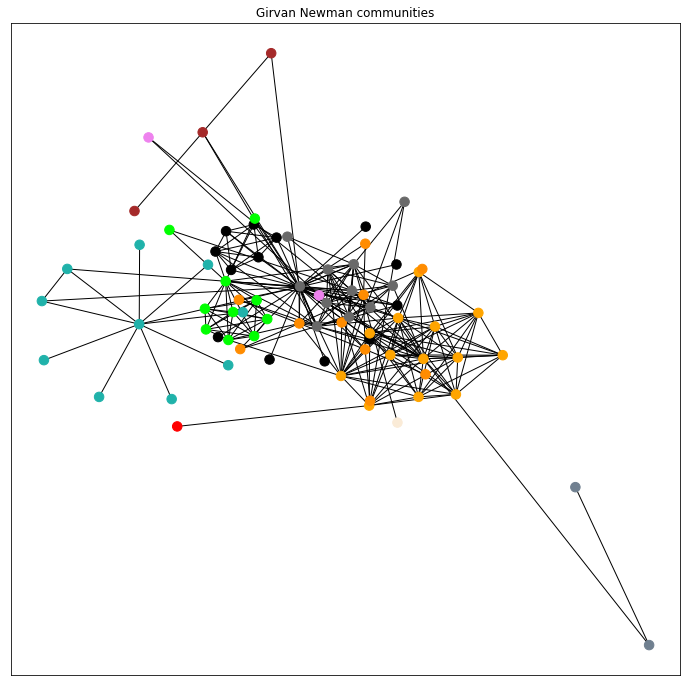

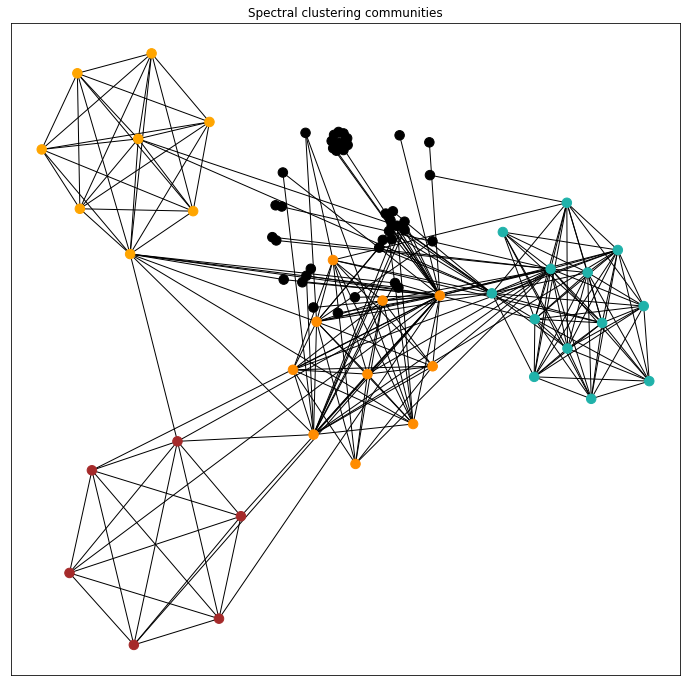

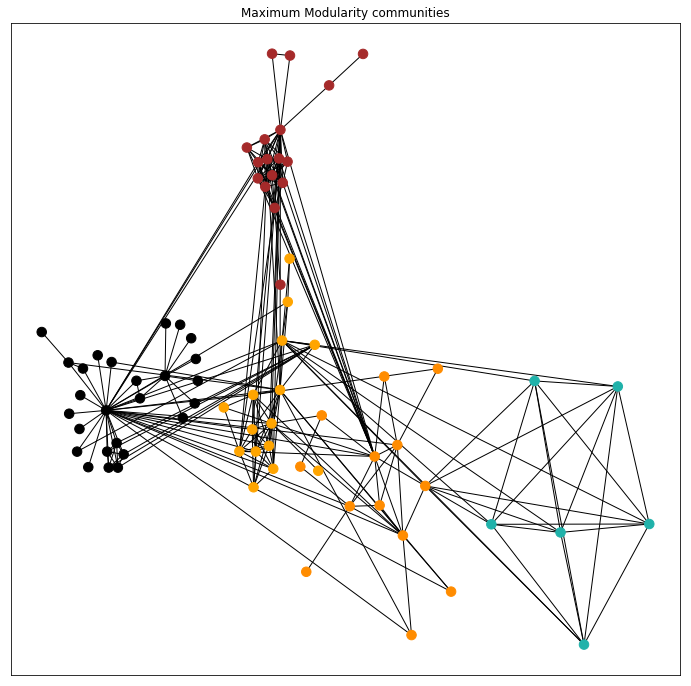

In [147]:
visualizer(new_lesmis)

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

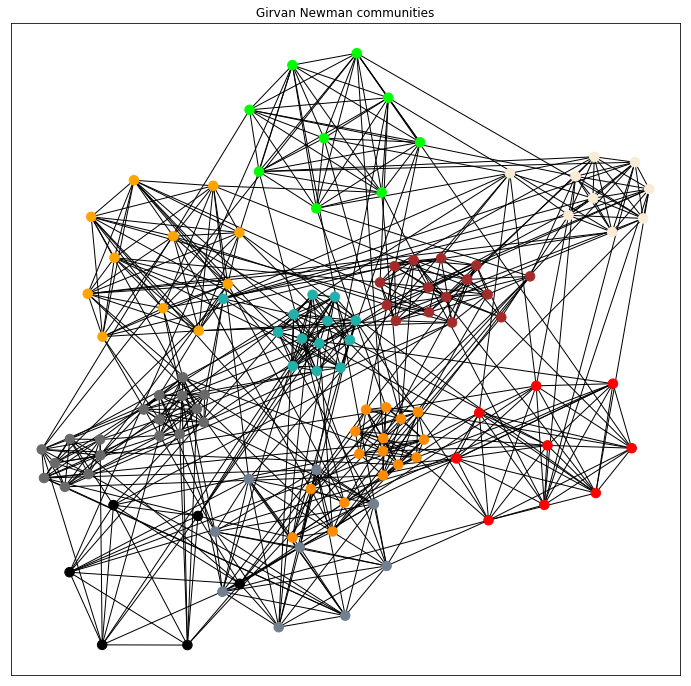

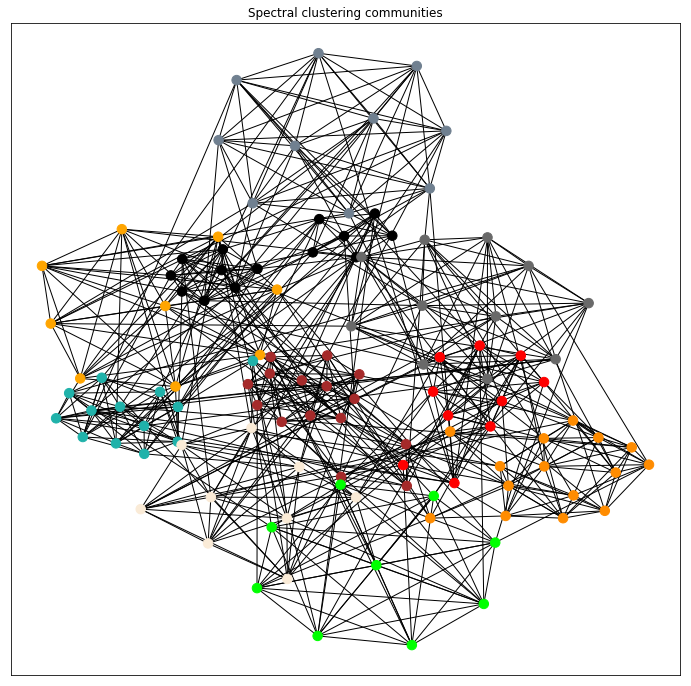

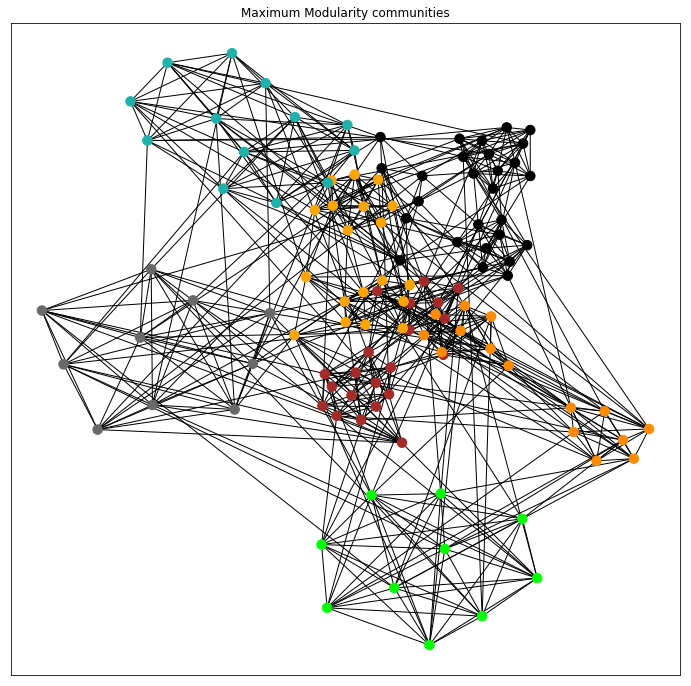

In [148]:
visualizer(new_football)

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

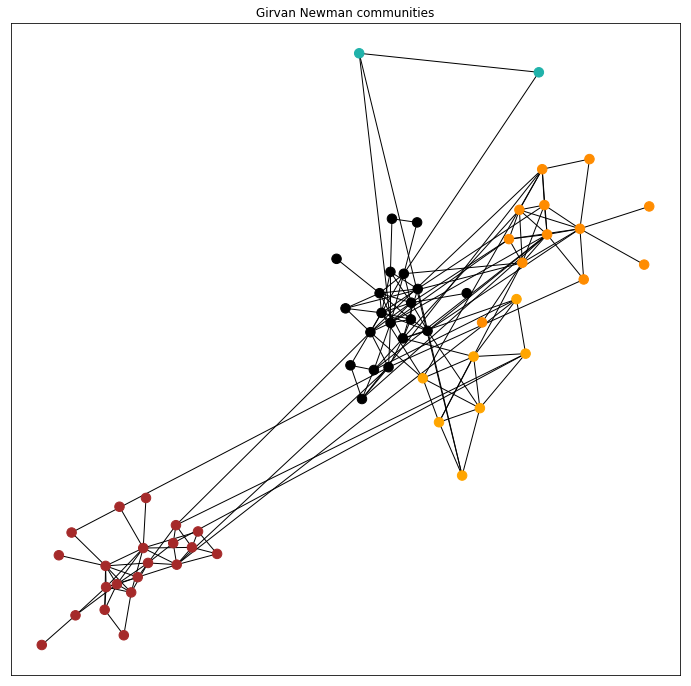

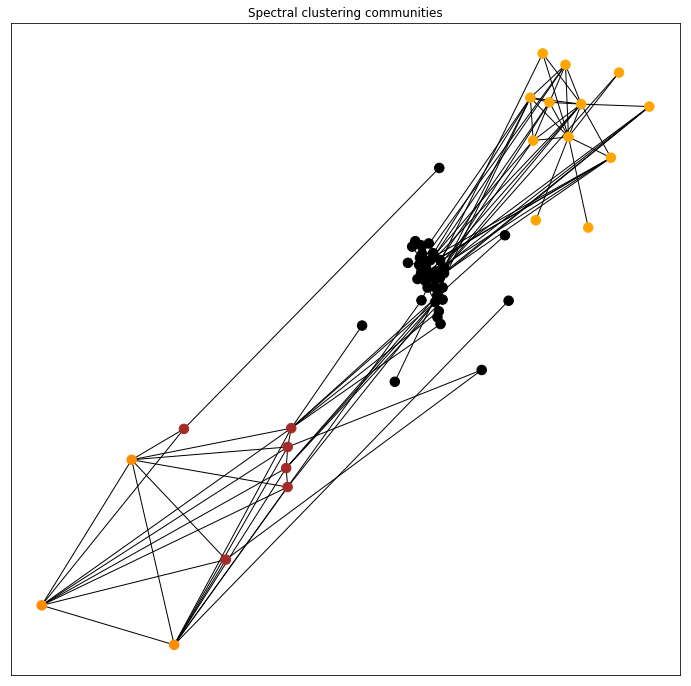

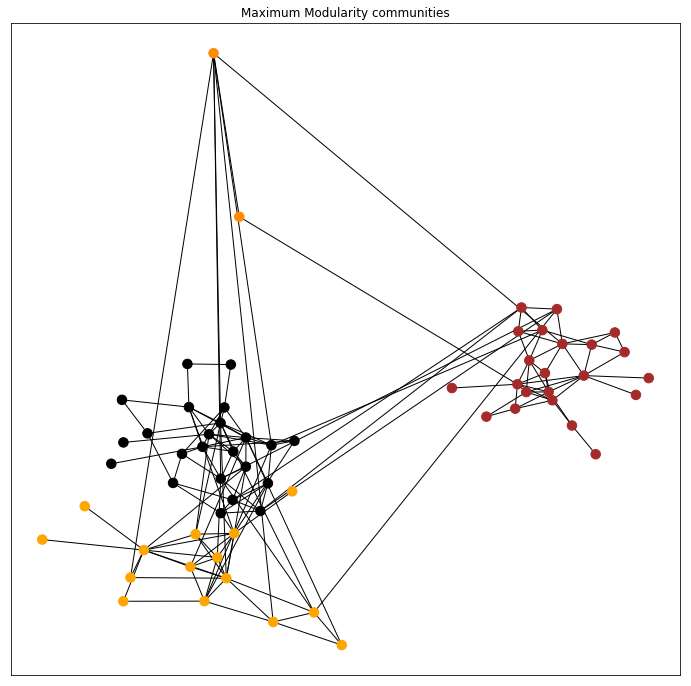

In [149]:
visualizer(new_dolphins)

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

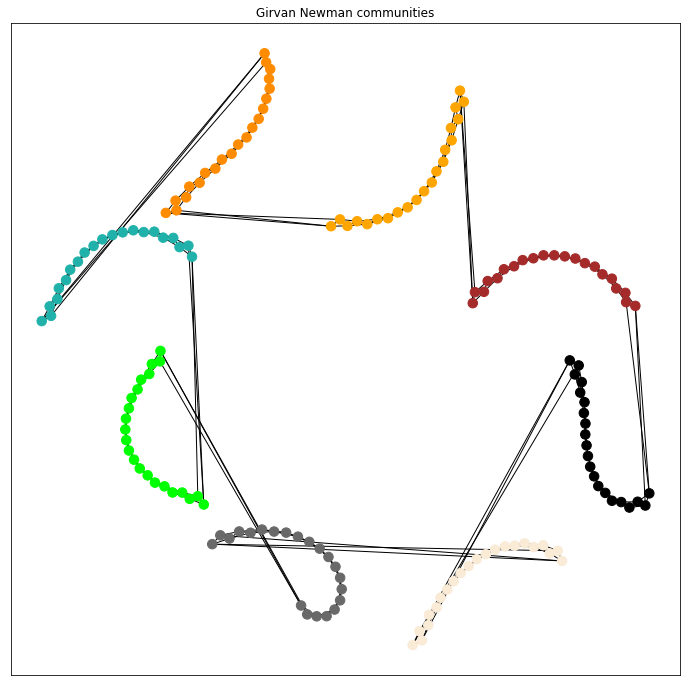

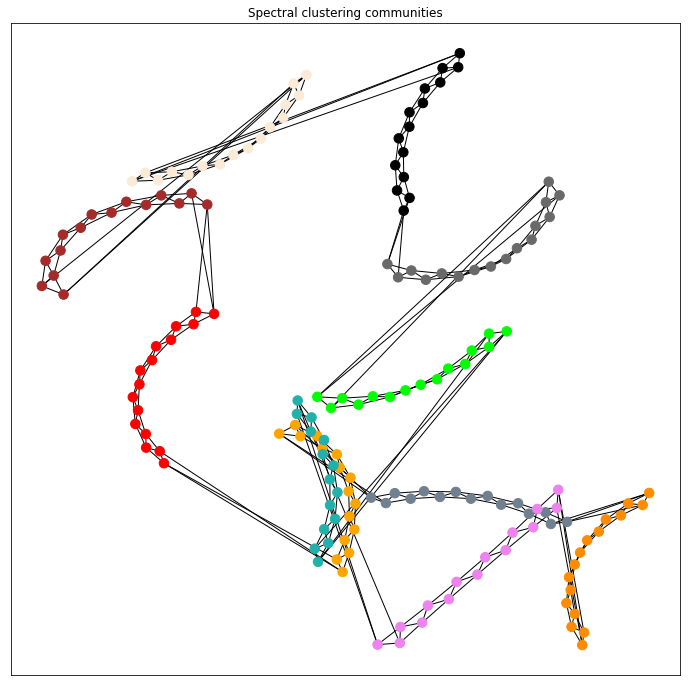

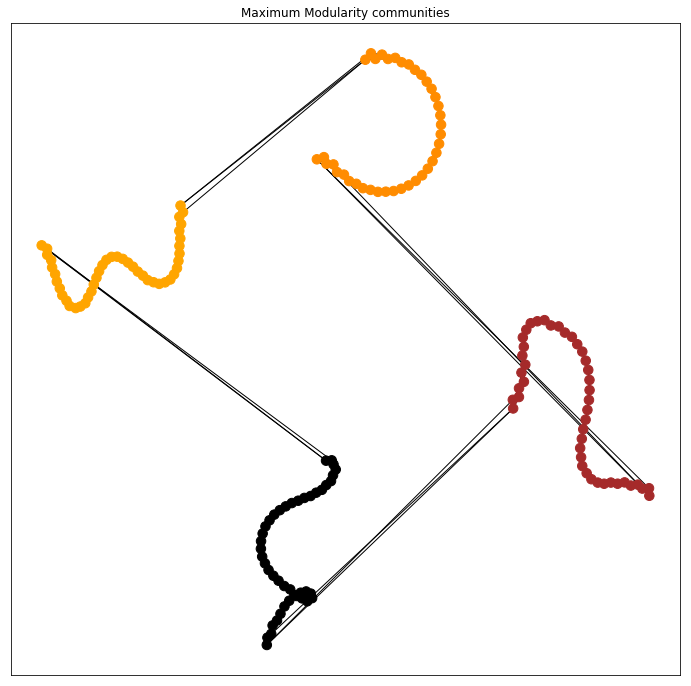

In [150]:
visualizer(REG)

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

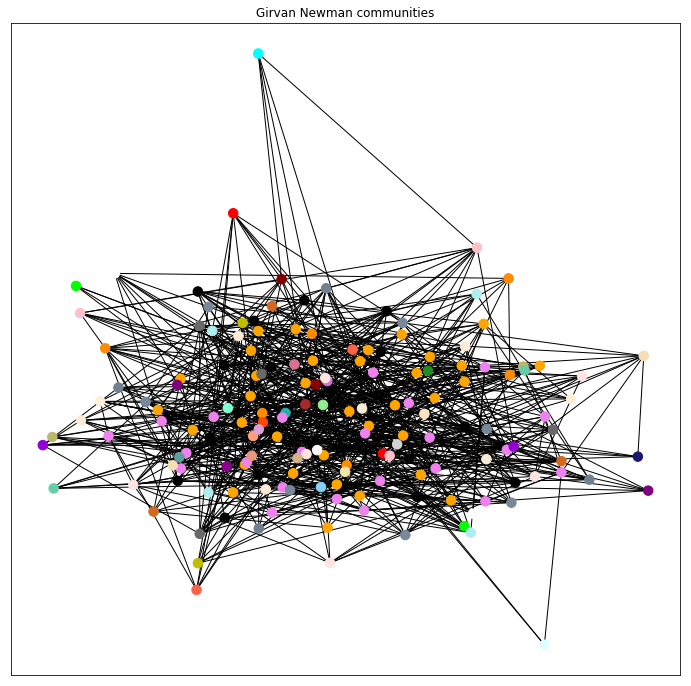

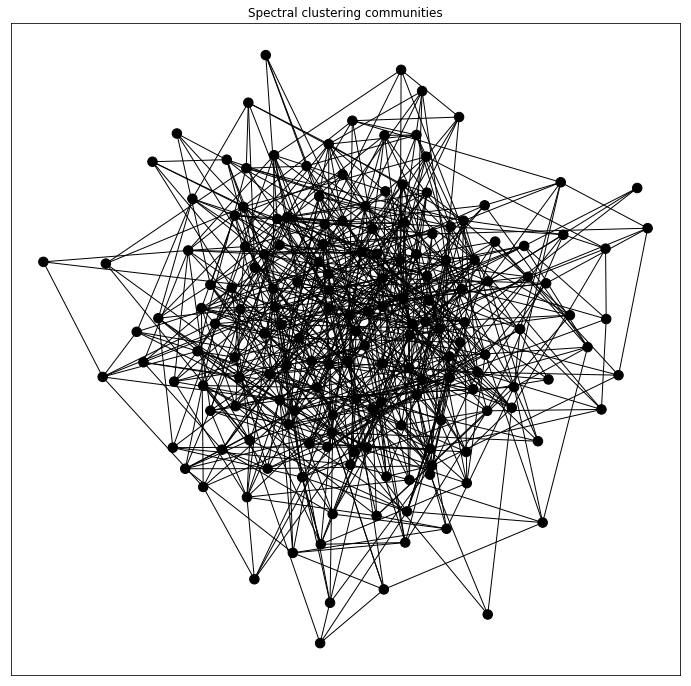

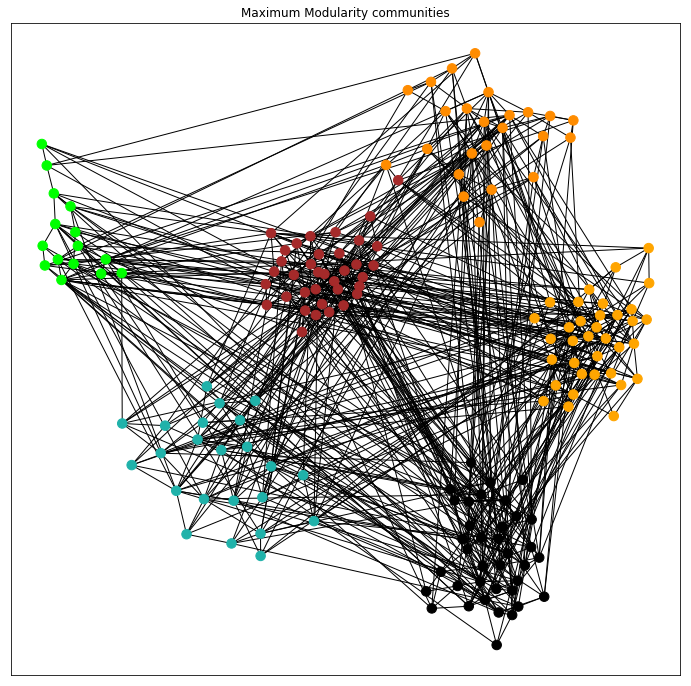

In [151]:
visualizer(RGER)

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

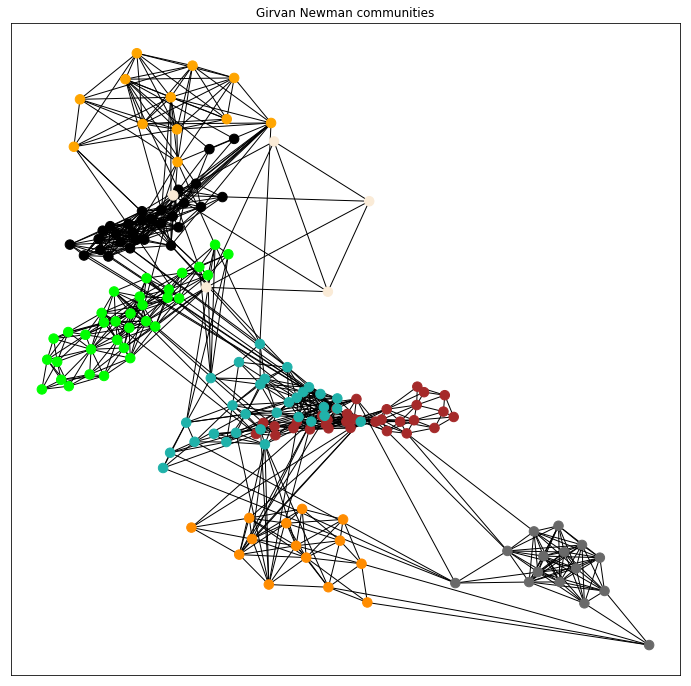

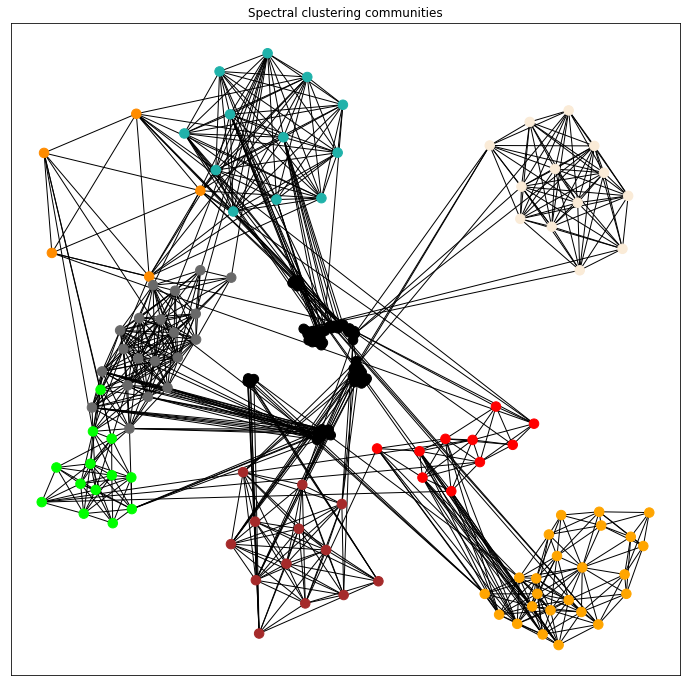

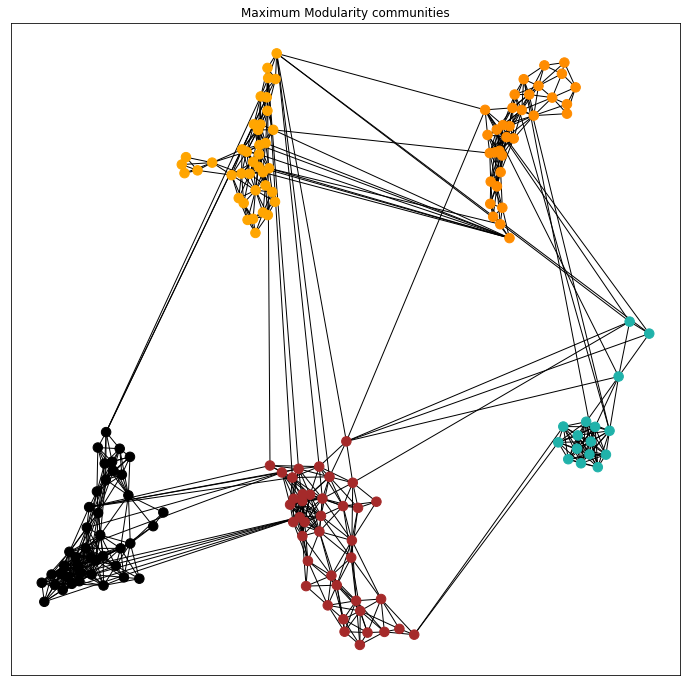

In [152]:
visualizer(RGG)

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

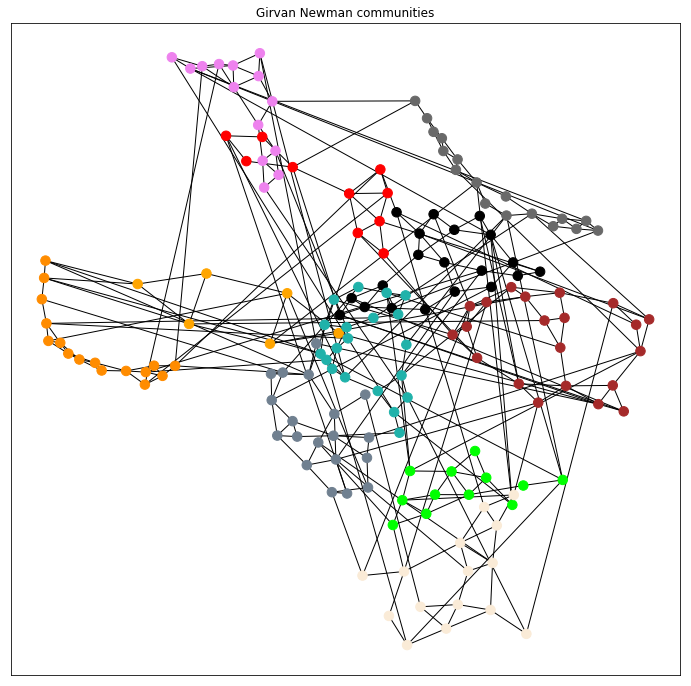

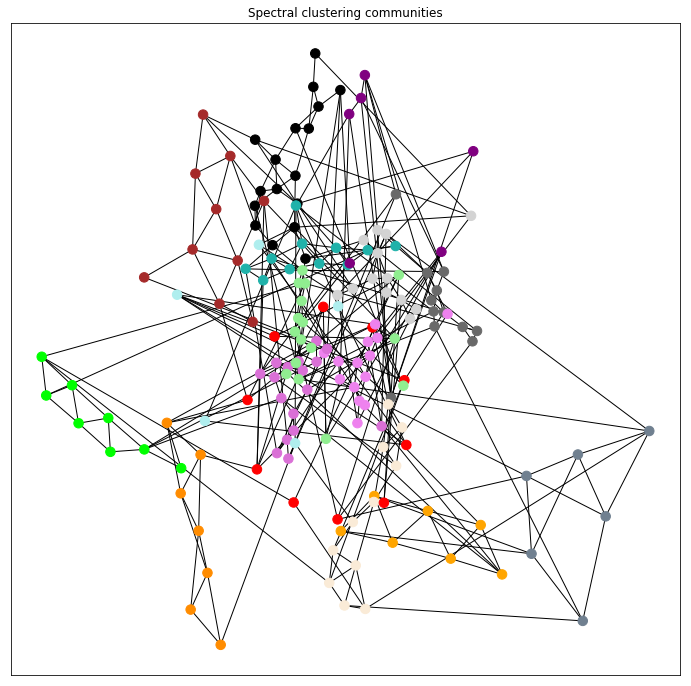

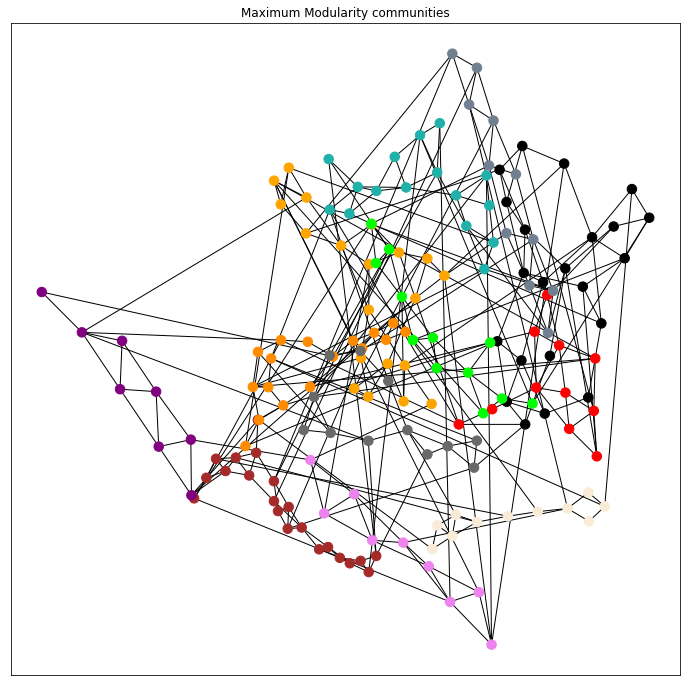

In [153]:
visualizer(SW)

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

/home/jim/.local/lib/python3.5/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


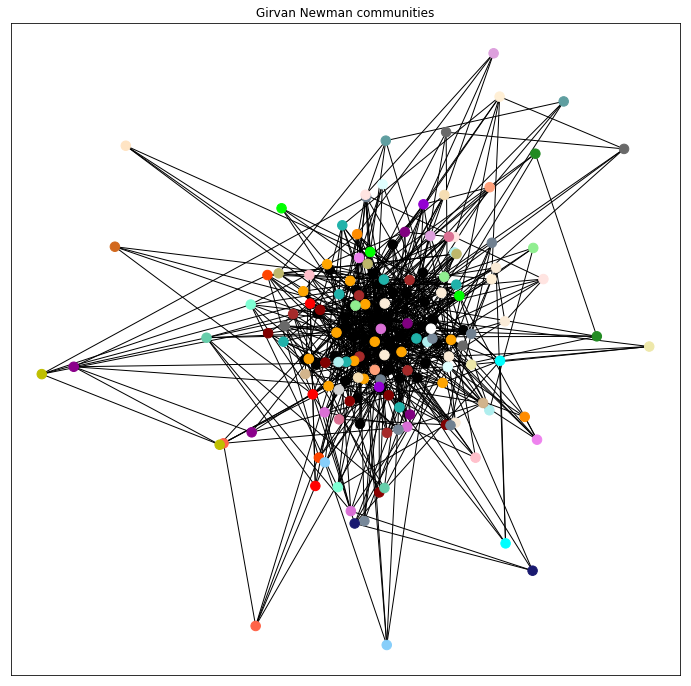

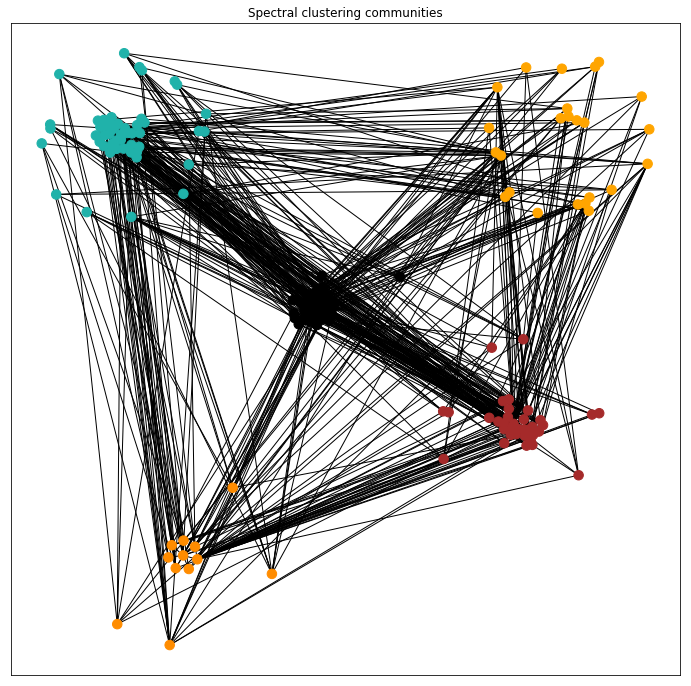

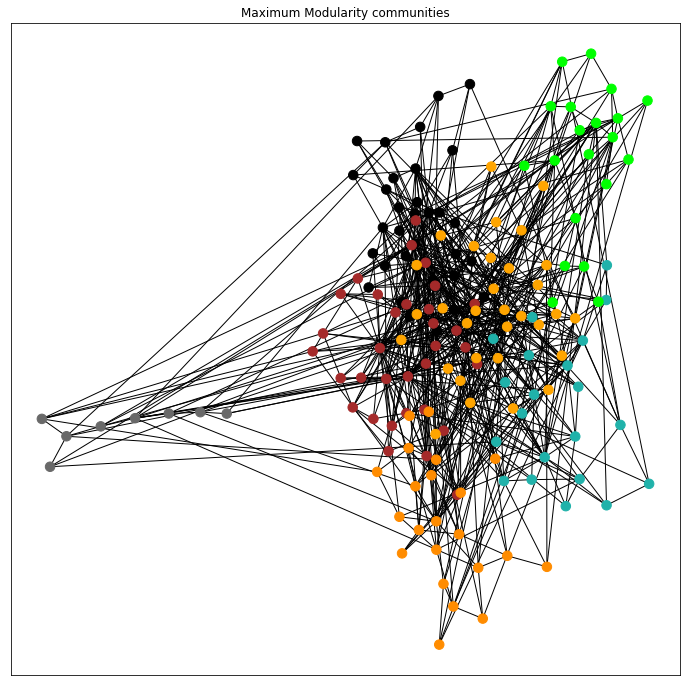

In [164]:
visualizer(SF)